# Biodiversity Portfolio Project


## Project Scope

Project Goals:
 1. Determine the distribution of species across different conservation states according to category.
 2. Are certain category of species more likely to be endangered?
 3. Are the differences between species and their conservation status significant?
 4. Which national park has the most protected species?
 

Steps for completion:
 1.  Explore the data and clean for analysis.
 2.  Plot neccessary visuals to answer questions we need.
 3.  Conclude our findings.

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

species = pd.read_csv('species_info.csv')
obsv = pd.read_csv('observations.csv')

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [152]:
obsv.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


We have loaded the data and looked at the first 5 rows of both.
 -  The species table contains category of the animal, its names, and its conversation status
 -  The observation table contains the animals locations and the number of obeservations in each park.
 
As you can see, there are missing values in the conservation status column, so lets investigate this.

In [121]:
print(species.conservation_status.unique())
print(obsv.park_name.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


We have 4 categories of conservation status : `Species of Concern`, `Endangered`, `Threatened` and  `In Recovery`.

Also we have 4 national parks in the dataset : `Great Smoky Mountains National Park`, `Yosemite National Park`, `Bryce National Park` and `Yellowstone National Park`.

In [122]:
print(species.count())
print(obsv.count())

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64
scientific_name    23296
park_name          23296
observations       23296
dtype: int64


In the `species` table, we have a total of 5824 different species, and we have 23296 in the `obsv` table.

From this, we can see there are only missing values in the conservation column, as the rest of the information is there.

There are 191 values in the column, and there are 4 values it can take, with the rest being NaN, suggesting that they are not endangered in anyway.

For the purpose of this analysis, we will only be looking at the species with a conservation status for the majority of the analysis.

In [169]:
species.fillna("No Status", inplace = True)

species.describe()





,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Castor canadensis,Brachythecium Moss,No Status
freq,4470,3,7,5633


In [170]:
obsv.value_counts()

scientific_name                      park_name                            observations  conservation_status
Poa compressa                        Great Smoky Mountains National Park  80            No Status              2
Salix exigua                         Yosemite National Park               186           No Status              2
Eleocharis palustris                 Great Smoky Mountains National Park  62            No Status              2
Potentilla norvegica                 Yosemite National Park               148           No Status              2
Spilogale putorius                   Yellowstone National Park            256           No Status              2
                                                                                                              ..
Entodon sullivantii                  Yosemite National Park               165           No Status              1
                                     Yellowstone National Park            237           No Status    

We can see there are also some duplicates in the species and observation data.
 -  In the species table, we can see that there is a differing number of unique scientific names than total count, and each species should have a unique name.
 -  In the observation table, there are rows which have been inputted into the table twice.

In [124]:
species.drop_duplicates(subset = ['scientific_name'],inplace = True)
obsv.drop_duplicates(inplace = True)



## Analysis.

First we will look at the distribution of species across the different conservation states

/Users/Ethan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


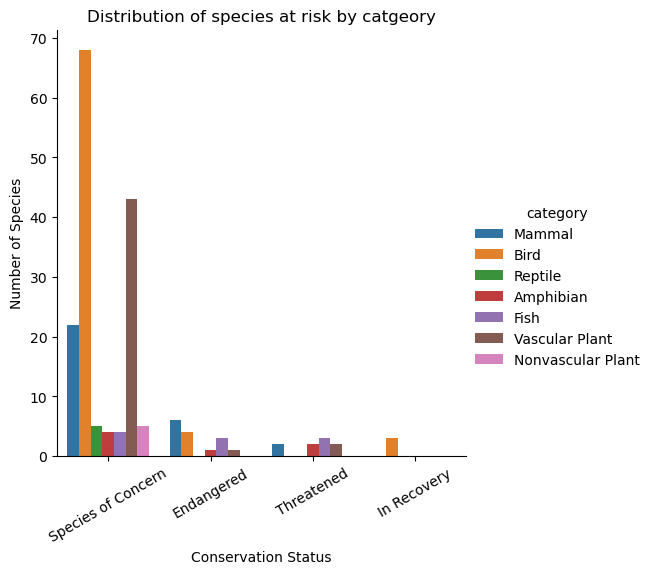

In [131]:
concerned_species = species[species.conservation_status != "No Status"]    

species_fig = sns.catplot(x = 'conservation_status', data = concerned_species, hue = 'category', kind = 'count')
plt.xticks(rotation = 30)
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.title("Distribution of species at risk by catgeory")
plt.show()

From this visual we can see:

-  Majority of the species are `Species of Concern`, with the majority of them being either `Bird` or `Vascular Plant`

-  There are much fewer `Endangered` species, with most of them being `Mammals`.

-  The only catgeory of species `In Recovery` are `Birds`.

### Does the category of animal impact likeliness of endangerement?


Next, we will investigate whether the category of the animal has an impact on whether it is going endangered or not.

In [144]:
species['protected'] = species.conservation_status != 'No Status'

category_counts = species.groupby(['category', 'protected']).scientific_name.nunique().reset_index().pivot(columns = 'protected', index = 'category', values = 'scientific_name').reset_index()

category_counts.columns = ['catgeory', 'not_protected', 'protected']

category_counts['percent_protected'] = (category_counts.protected)*100/(category_counts.protected+category_counts.not_protected)

category_counts

,catgeory,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,10,8.000000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


From this, we can see that `Mammals` and `Birds` have a higher percentage of protected species, and `Nonvascular Plant` and `Vascular Plant` have a lower percentage.

## Statistical Significance

Next, we will see if there is any statistical significance in the difference between conservation status rates in different species.

First, we will look at `Amphibians` and `Fish`.

To do this, we will make a contingency table and look at the expected p-values.

||protected|not-protected|
|-|-|-|
|Amphibian|?|?|
|Fish|?|?|


In [148]:
from scipy.stats import chi2_contingency

amp_fish_contingency = [[7,72],
                       [10, 115]]

print(chi2_contingency(amp_fish_contingency))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[  6.58333333,  72.41666667],
       [ 10.41666667, 114.58333333]]))


From this we get a p-value of 1.0. The standard p-value to test for statistical significance is 0.05. Since our p-value is much higher, we can conclude there is no significant relationship between `Amphibian` and `Fish`

We will change it to test the significance between `Amphibian` and `Mammal`

||protected|not-protected|
|-|-|-|
|Amphibian|?|?|
|Mammal|?|?|


In [149]:
amp_mammal_contingency = [[7, 72],
                         [30, 146]]
chi2_contingency(amp_mammal_contingency)

Chi2ContingencyResult(statistic=2.321746712946015, pvalue=0.12757669693198975, dof=1, expected_freq=array([[ 11.4627451,  67.5372549],
       [ 25.5372549, 150.4627451]]))

This time we get a p-value of 0.12. This is still not significant since it is higher than the threshold value of 0.05, but it is closer than last time, suggesting a stronger relationship between `Amphibian` and `Mammal`

## Comparing National Parks 

Next, we want to see which national parks are home to the most endangered species.

/Users/Ethan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


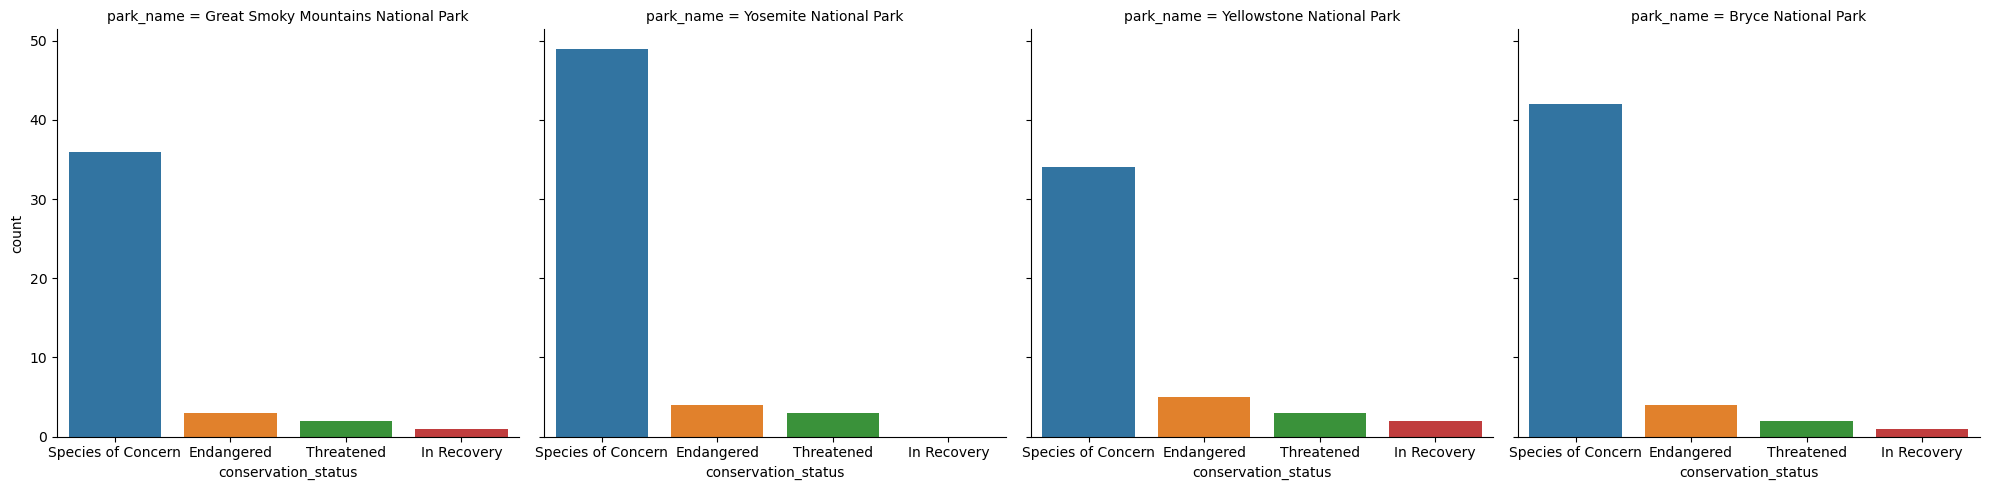

In [165]:
obsv['conservation_status'] = species.conservation_status
obsv.fillna("No Status", inplace = True)

obsv_protected = obsv[obsv.conservation_status != 'No Status']

park_fig = sns.catplot(x = 'conservation_status', data = obsv_protected, col = 'park_name', kind = 'count')

num_obsv = obsv.groupby('park_name').sum()
print(num_obsv.observations)

`Yosemite National Park` has the most species of concern present, and `Yellowstone National Park` has the most endangered species present.

Also, we can see that all of the park have had a differing number of animal observations across the 7 days, indicating the size of the parks. However, they all have similiar number of species with conservation statuses, suggesting that the size of the park does not correlate to the number of species at risk.

## Conclusion.


We have successfully looked over the data and answered some questions we asked at the start of the project.

 1. What is the distribution of species across conservation statuses?
  -  Most of the species are not protected (191 vs 5633)
  -  Of the species with a conservation status, most of them are Species of Concern, and these are made up most of Mammals and Birds.
  
 2. Does the catgeory of animal effect the likeliness of being at risk?
  -  Mammals and Birds had a higher chance of being in protection.
 
 3. Are the difference in protection levels between different species significant?
  - From the two combinations we tested, we didn't see any significant difference between the levels of protection, however, the p-values of the two combinations were very different, suggesting there was some difference between them.
  
 4. What national parks were home to the most species with conservation statuses.
  -  Yosemite National Park had the most Species of Concern, while Yellowstone National Park had the most Endangered species.
  